In [1]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.6.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.19.5
import numpy as np

# pandas  0.25.3
import pandas as pd

# scikit-learn  0.22
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# matplotlib  3.1.2
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot


# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

In [29]:
df = pd.read_csv('./A_data_2022.csv')

display(df.head(10))
df.shape

,teamname1,Aatrox1,Ahri1,Akali1,Alistar1,Amumu1,Anivia1,Annie1,Ashe1,Aurelion Sol1,...,firstblood,firstdragon,firstherald,firstbaron,firsttower,GDa10,XPDa10,GDa15,XPDa15,result
0,Fnatic Academy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2265.0,-357.0,-2864.0,-2168.0,0
1,AlienTech eSports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1778.0,877.0,4520.0,4241.0,1
2,unknown team,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,315.0,729.0,-984.0,-1094.0,1
3,Team Forge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-505.0,-394.0,-3485.0,-3181.0,0
4,LDLC OL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1623.0,-517.0,-5963.0,-2883.0,0
5,Fnatic Academy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,175.0,-906.0,-3256.0,-2925.0,0
6,AlienTech eSports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-694.0,-620.0,-2981.0,-1089.0,0
7,ASUS ROG Army,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-757.0,-305.0,-41.0,422.0,1
8,Team Kinguin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1667.0,-522.0,-1446.0,-43.0,0
9,EURONICS Gaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2480.0,-91.0,-4367.0,-1490.0,0


(55332, 533)

In [30]:
label_le = LabelEncoder()
df['result'] = label_le.fit_transform(df['result'].values)

#processing catregory
label_category = LabelEncoder()
category_features = df.columns[1:532]
categories = []

for i in category_features:
  df[i] = label_category.fit_transform(df[i].values)
  class_list = label_category.classes_.tolist()

  # replace '?' with 'NaN'
  if ' ' in class_list:
      idx = class_list.index(' ')
      df[i] = df[i].replace(idx, np.nan)
  
  categories.append(np.arange(len(class_list)))

display(df.head(10))

,teamname1,Aatrox1,Ahri1,Akali1,Alistar1,Amumu1,Anivia1,Annie1,Ashe1,Aurelion Sol1,...,firstblood,firstdragon,firstherald,firstbaron,firsttower,GDa10,XPDa10,GDa15,XPDa15,result
0,Fnatic Academy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1690,2731,4007,2910,0
1,AlienTech eSports,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,5728,3965,11216,9081,1
2,unknown team,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,4265,3817,5879,3979,1
3,Team Forge,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,3445,2694,3400,1927,0
4,LDLC OL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2328,2571,1329,2207,0
5,Fnatic Academy,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,4125,2182,3620,2166,0
6,AlienTech eSports,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,3256,2468,3891,3984,0
7,ASUS ROG Army,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,3193,2783,6822,5495,1
8,Team Kinguin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2284,2566,5418,5030,0
9,EURONICS Gaming,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1480,2997,2556,3583,0


In [31]:
X = df.drop(['teamname1', 'teamname2', 'chemtech1', 'hextech1', 'chemtech2', 'hextech2', 'turrets1', 'turrets2', 'result'], axis=1).values
Y = df['result'].values

display(X.shape)

(55332, 524)

In [32]:
display(df.isnull().sum())

print(df.shape)

# drop rows with missing values
df_drop_row = df.dropna()
print(df_drop_row.shape)

teamname1    14
Aatrox1       0
Ahri1         0
Akali1        0
Alistar1      0
             ..
GDa10         0
XPDa10        0
GDa15         0
XPDa15        0
result        0
Length: 533, dtype: int64

(55332, 533)
(55318, 533)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pipe_knn = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("scl", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors = 10, p = 2, metric = "minkowski"))
])

pipe_svm = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("scl", StandardScaler()),
    ('clf', SVC(kernel = "rbf", random_state = 0, gamma = 0.001, C = 100.0))
])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 1109
Accuracy: 0.8998

[SVC]
Misclassified samples: 90
Accuracy: 0.9919


In [7]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.8.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.22.4
import numpy as np

# pandas  1.2.4
import pandas as pd

# scikit-learn  0.24.1
from sklearn import datasets
load_iris = datasets.load_iris
make_moons = datasets.make_moons
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# matplotlib  3.3.4
import matplotlib.pyplot as plt

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")
    
import warnings
warnings.filterwarnings("ignore")

In [8]:
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', LogisticRegression(C = 10, random_state = 0, solver = "liblinear")]])
pipe2 = Pipeline([['clf', DecisionTreeClassifier(max_depth = None, random_state = 0)]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', KNeighborsClassifier(n_neighbors = 5)]])

clf_labels = ['LogisticRegression', 'DecisionTree', 'KNN']

best_vt, best_w, best_score = None, (), -1
for a, b, c in list(itertools.permutations(range(0,3))):
    clf = VotingClassifier(estimators=[('LogisticRegression', pipe1), ('DecisionTree', pipe2), ('KNN', pipe3)], 
                           voting='soft', weights=[a,b,c])
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    print('%s: %.3f (+/- %.3f)' % ((a,b,c), scores.mean(), scores.std()))
    if best_score < scores.mean():
        best_vt, best_w, best_score = clf, (a, b, c), scores.mean()

(0, 1, 2): 0.959 (+/- 0.003)
(0, 2, 1): 0.985 (+/- 0.002)
(1, 0, 2): 0.961 (+/- 0.002)
(1, 2, 0): 0.985 (+/- 0.002)
(2, 0, 1): 0.990 (+/- 0.002)
(2, 1, 0): 0.991 (+/- 0.002)


In [9]:
print("[Voting]")
print('\nBest %s: %.3f' % (best_w, best_score))
voting = best_vt.fit(X_train, y_train)
y_train_pred = voting.predict(X_train)
y_test_pred = voting.predict(X_test)
voting_train = accuracy_score(y_train, y_train_pred) 
voting_test = accuracy_score(y_test, y_test_pred)
print("Train Acc:", voting_train)
print("Test  Acc:", voting_test)

[Voting]

Best (2, 1, 0): 0.991
Train Acc: 0.9983282503106292
Test  Acc: 0.9928616607933496


In [10]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.7, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=1, random_state=1)

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('[Bagging]')
print('accuracy-train = %.3f, accuracy-test = %.3f' % (bag_train, bag_test))

[Bagging]
accuracy-train = 1.000, accuracy-test = 0.993


In [ ]:
df = df.drop(['teamname1', 'teamname2', 'chemtech1', 'hextech1', 'chemtech2', 'hextech2', 'turrets1', 'turrets2', 'result'], axis=1)

<BarContainer object of 10 artists>

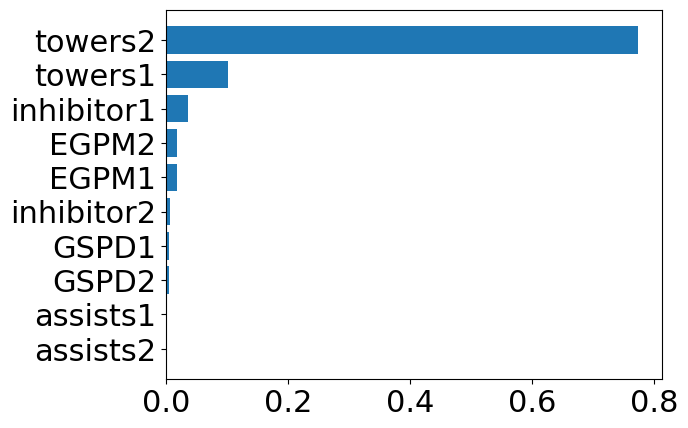

In [48]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)
sorted_idx = feature_importances.argsort()

plt.barh((df.columns[sorted_idx])[514:526].tolist(), feature_importances[sorted_idx][514:526])

In [11]:
ada_pipeline = Pipeline(steps = [("clf", AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

params_grid = {
    'clf__base_estimator__max_depth': [5, 7, 9, 10, 20],
    'clf__n_estimators': [1, 10, 50, 100, 150, 200]
}

ada_grid = GridSearchCV(
    estimator = ada_pipeline, 
    param_grid = params_grid, 
    scoring = "accuracy",
    n_jobs = 2,
    cv = 5
)

ada_grid.fit(X_train, y_train)

y_train_pred = ada_grid.predict(X_train)
y_test_pred = ada_grid.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print("[Adaboost_BaseTree_MaxDepth=Best]")
print("Train Acc:", ada_train)
print("Test  Acc:", ada_test)
print(ada_grid.best_params_)

[Adaboost_BaseTree_MaxDepth=Best]
Train Acc: 1.0
Test  Acc: 0.9924098671726755
{'clf__base_estimator__max_depth': 5, 'clf__n_estimators': 150}
